## Import the necessary libraries

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

from datetime import date
import math
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


## Read data from CSV file

In [54]:
df = pd.read_csv("2023-02-16.csv")
# df = pd.read_csv(f"{date.today()}.csv")
df = df.drop(df.columns[0], axis=1)
# df = df.astype({df.columns[i]:'Int64' for i in range(1,len(columns)-1)})
df

,"Country, Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,Continent
0,USA,105665981,1149253.0,103319965.0,1196763.0,2157.0,315604.0,3433.0,1.169268e+09,3492381.0,3.348053e+08,North America
1,India,44691956,530789.0,44156970.0,4197.0,NaN,31772.0,377.0,9.198164e+08,653914.0,1.406632e+09,Asia
2,France,39667102,165240.0,39435308.0,66554.0,869.0,604824.0,2519.0,2.714902e+08,4139547.0,6.558452e+07,Europe
3,Germany,38276190,169345.0,37906300.0,200545.0,NaN,456301.0,2019.0,1.223324e+08,1458359.0,8.388360e+07,Europe
4,Brazil,37085520,699310.0,36249161.0,137049.0,NaN,172208.0,3247.0,6.377617e+07,296146.0,2.153536e+08,South America
...,...,...,...,...,...,...,...,...,...,...,...,...
226,Diamond Princess,712,13.0,699.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Vatican City,29,NaN,29.0,0.0,NaN,36295.0,NaN,NaN,NaN,7.990000e+02,Europe
228,Western Sahara,10,1.0,9.0,0.0,NaN,16.0,2.0,NaN,NaN,6.261610e+05,Africa
229,MS Zaandam,9,2.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

# Visualization
## Correlation between 2 attributes

In [77]:
def correlation_2_attr(attr1, attr2):
    x_values = df[f'{attr1}'].apply(lambda x: math.log10(x))
    y_values = df[f'{attr2}'].apply(lambda x: math.log10(x))
    plt.scatter(x_values, y_values)
    plt.title(f'{attr1} and {attr2} Correlation (log scale)')
    plt.xlabel(attr1)
    plt.ylabel(attr2)
    plt.plot([0, max(x_values)], [0, max(x_values)], label=f'Where {attr1} equals to {attr2}')
    plt.legend()
    plt.show()

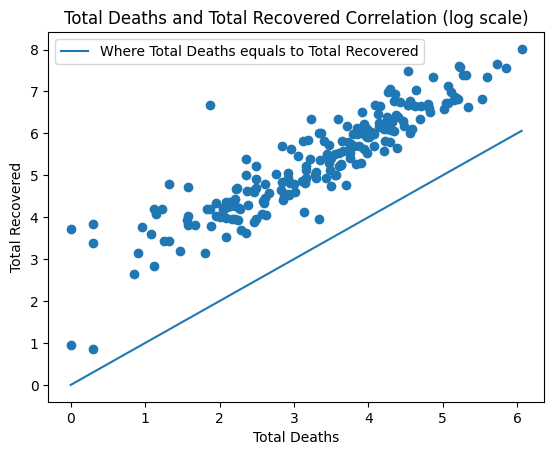

In [4]:
correlation_2_attr('Total Deaths','Total Recovered')

`Comment:` 
- All countries have more recovered cases than death cases.
- Recovered cases and death cases have positive linear correlation.

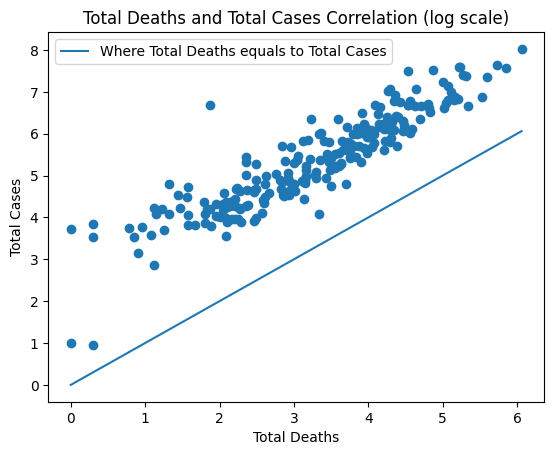

In [5]:
correlation_2_attr('Total Deaths','Total Cases')

`Comment:` no difference with correlation between Recovered cases and Death cases

### Overview of the epidemic situation in the world and continent

In [34]:
fig = go.Figure(data = go.Choropleth(locations = df['Country, Other'],locationmode = 'country names',z = df['Total Cases'],text = df['Country, Other'],
    colorscale = 'viridis',
    autocolorscale = False,
    reversescale = True,
    colorbar_title = 'Total Covid Cases',
))
fig.update_layout(title_text = 'Covid-19',geo = dict(showframe = False,showcoastlines = False,projection_type = 'orthographic'))
fig.show()

`Comment`:

In [82]:
Continent = df[['Total Cases','Total Deaths','Total Recovered','Active Cases','Continent']]
Continent = Continent.dropna().groupby('Continent').sum()#.astype(int)
Continent

,Total Cases,Total Deaths,Total Recovered,Active Cases
Continent,,,,
Africa,11556054,228110.0,10960260.0,367684.0
Asia,197558301,1436618.0,182634450.0,13487233.0
Australia/Oceania,13908879,25380.0,13815105.0,68394.0
Europe,246741983,2022650.0,242554289.0,2165044.0
North America,124129707,1602400.0,120382331.0,2144976.0
South America,67198217,1329918.0,65586258.0,282041.0


In [84]:
Continent = df[['Total Cases','Total Deaths','Total Recovered','Active Cases','Continent']]
Continent = Continent.groupby('Continent').sum()#.astype(int)
Continent

,Total Cases,Total Deaths,Total Recovered,Active Cases
Continent,,,,
Africa,12802223,258615.0,10960262.0,369848.0
Asia,214819047,1538868.0,182634450.0,13487233.0
Australia/Oceania,14039060,26243.0,13815896.0,71206.0
Europe,247023846,2023023.0,242554318.0,2165044.0
North America,125046486,1615689.0,120382331.0,2144976.0
South America,68091121,1351202.0,65588188.0,282041.0


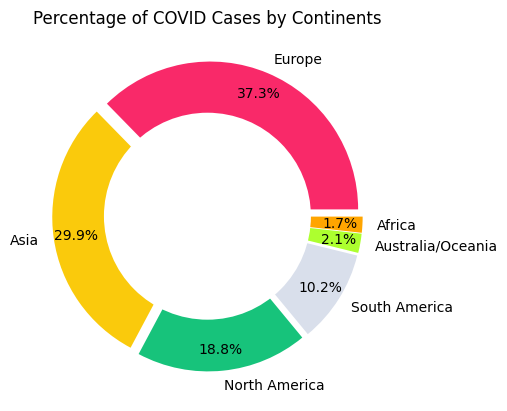

In [59]:
def donut_attri_product(attr):
	data = Continent.sort_values(by=attr, ascending=0)
	colors = ['#F92969','#FACA0C','#17C37B','#D9DFEB','#ADFF2F','#FFA500']
	explode = [0.05]*6

	plt.pie(data[f'{attr}'], colors=colors, labels=data.index,
			autopct='%1.1f%%', pctdistance=0.85, explode=explode)

	# draw circle
	centre_circle = plt.Circle((0, 0), 0.70, fc='white')
	fig = plt.gcf()

	# Adding Circle in Pie chart
	fig.gca().add_artist(centre_circle)

	plt.title(f'Percentage of COVID Cases by Continents')
	plt.show()

donut_attri_product('Total Cases')

`Comment:`
- Europe have highest the total cases.
- Meanwhile, Africa has weak medical, but the number of total cases of Africa is the smalest one.

- Radar chart code is referenced from [website](https://betterdatascience.com/radar-charts-matplotlib-plotly/)

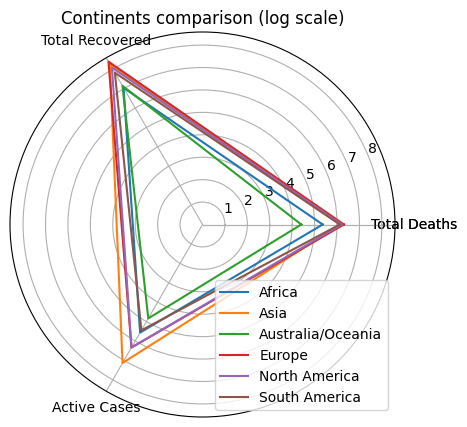

In [60]:
categories = list(Continent.columns[1:4])
categories = [*categories,categories[0]]

label_loc = np.linspace(start=0, stop=2*np.pi, num=4)

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
for i in range(len(Continent.index)):
    data = list(Continent.iloc[i,1:4].apply(lambda x: math.log10(x)))
    plt.plot(label_loc, [*data,data[0]], label=Continent.index[i])

plt.title('Continents comparison (log scale)')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

`Comment:` 
- Recovered rate is high in all continents.
- Asia has highest total cases but the number of recovered and deaths is near to America and Europe.
- 

In [85]:
fig=go.Figure(data=[
      go.Bar(name='Total cases',x=Continent.index,y=Continent['Total Cases'],text=Continent['Total Cases']),
      go.Bar(name='Total Deaths',x=Continent.index,y=Continent['Total Deaths'],text=Continent['Total Deaths']),
      go.Bar(name='Total Recovered',x=Continent.index,y=Continent['Total Recovered'],text=Continent['Total Recovered'])
   ])
fig.update_layout(barmode='group')
fig.update_traces(texttemplate='%{text:.4s}', textposition='outside')
fig.update_layout(yaxis_range=[0,300000000])
fig.show()

`Comment`:

In [56]:
percent_continent = Continent[['Total Recovered','Total Deaths','Active Cases']].div(Continent['Total Cases'], 0)*100
percent_continent

,Total Recovered,Total Deaths,Active Cases
Continent,,,
Africa,94.844313,1.973944,3.181744
Asia,92.445850,0.727187,6.826963
Australia/Oceania,99.325798,0.182473,0.491729
Europe,98.302804,0.819743,0.877453
North America,96.981080,1.290908,1.728012
South America,97.601188,1.979097,0.419715


In [75]:
dv=df[['Total Cases','Total Deaths','Total Recovered','Active Cases','Continent']]
dv=dv.groupby('Continent').sum()
dv['Per_Deaths']=round((dv['Total Deaths']/dv['Total Cases'])*100,3)
dv['Per_Recovered']=round((dv['Total Recovered']/dv['Total Cases'])*100,3)
dv['Per_Active']=round((dv['Active Cases']/dv['Total Cases'])*100,3)
dv

,Total Cases,Total Deaths,Total Recovered,Active Cases,Per_Deaths,Per_Recovered,Per_Active
Continent,,,,,,,
Africa,12802223,258615.0,10960262.0,369848.0,2.020,85.612,2.889
Asia,214819047,1538868.0,182634450.0,13487233.0,0.716,85.018,6.278
Australia/Oceania,14039060,26243.0,13815896.0,71206.0,0.187,98.410,0.507
Europe,247023846,2023023.0,242554318.0,2165044.0,0.819,98.191,0.876
North America,125046486,1615689.0,120382331.0,2144976.0,1.292,96.270,1.715
South America,68091121,1351202.0,65588188.0,282041.0,1.984,96.324,0.414


In [12]:
fig=go.Figure(data=[
      go.Bar(name=' Percent total Deaths',x=dv.index,y=dv['Per_Deaths'],text=dv['Per_Deaths']),
      go.Bar(name='Percent total Recovered',x=dv.index,y=dv['Per_Recovered'],text=dv['Per_Recovered'])
   ])
fig.update_layout(barmode='group')
fig.update_traces(texttemplate='%{text:.4s}', textposition='outside')
fig.show()

`Commnet`:

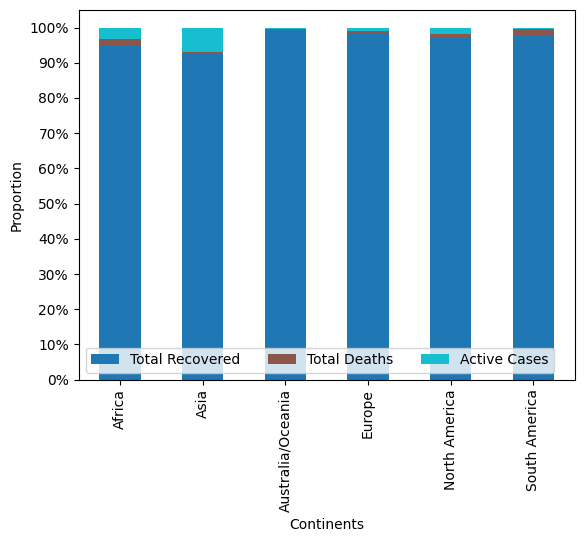

In [76]:
from matplotlib.ticker import FormatStrFormatter

percent_continent.plot(kind='bar', stacked=True, colormap='tab10')

plt.legend(ncol=3)
plt.xlabel("Continents")
plt.ylabel("Proportion")
plt.yticks(range(0,101,10))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d%%'))
plt.show()

`Comment:`
- Asia has the highest active cases.
- Australia/Oceania seems to be dealing with Covid epidemic most effectively.
- Meanwhile, Africa and South America have the highest Deaths ratio.

## Analysis of disease control in continents

In [15]:
newDf1 = df[['Tests/ 1M pop','Continent']]
ContinentForTest = newDf1.dropna().groupby('Continent').mean().astype(int).apply(lambda x: x/pow(10,4))
ContinentForTest.rename(columns = {'Tests/ 1M pop':'Test rate per person'}, inplace = True)

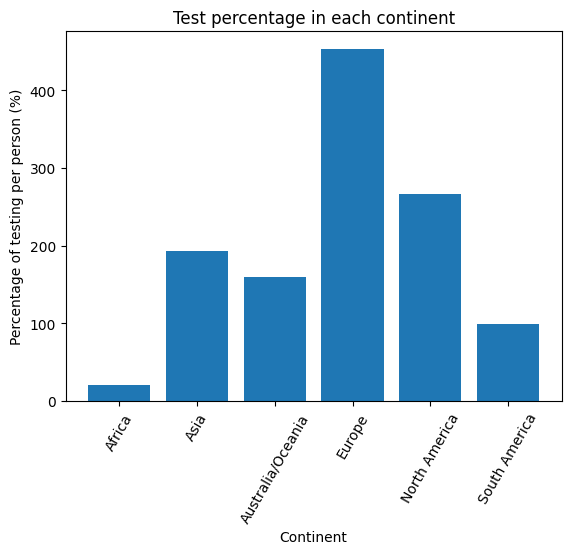

In [16]:
fig, ax = plt.subplots()
continents = list(ContinentForTest.index)
numCon0 = np.arange(0,len(continents))  
raito = ContinentForTest['Test rate per person'].values
ax.bar(continents,raito) 
ax.set_ylabel('Percentage of testing per person (%)')
ax.set_xlabel('Continent')
ax.set_title('Test percentage in each continent')
plt.xticks(numCon0,continents,rotation=60)
plt.show()

`Comment:` 
- The rate of people being tested in Europe is the highest of all continents, which shows that Europe's epidemic screening is quite effective at the testing stage to screen for infected and non-infected cases.
- The testing rate of people in Africa is the lowest, which shows that the ability to screen for infected and non-infected cases is the lowest in all continents and at an alarming rate.

In [17]:
newDf2 = df[['Deaths/ 1M pop','Continent']]
ContinentForDeath = newDf2.dropna().groupby('Continent').mean().astype(int).apply(lambda x: x/pow(10,4))
ContinentForDeath.rename(columns = {'Deaths/ 1M pop':'Death rate per person'}, inplace = True)

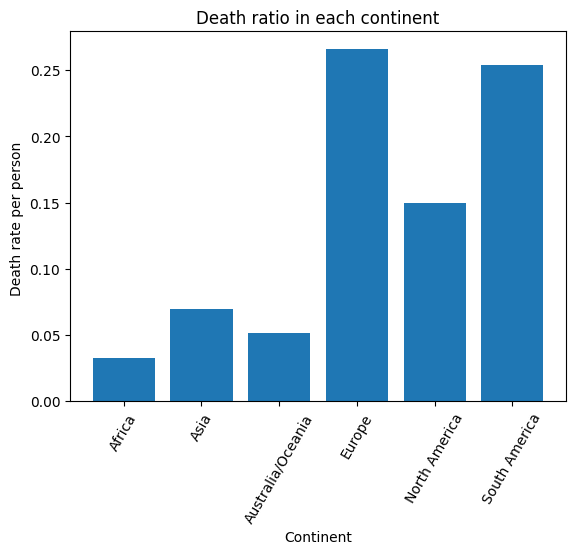

In [18]:
fig, ax = plt.subplots()
continents1 = list(ContinentForDeath.index)
numCon1 = np.arange(0,len(continents1))  
raito = ContinentForDeath['Death rate per person'].values
ax.bar(continents,raito) 
ax.set_ylabel('Death rate per person ')
ax.set_xlabel('Continent')
ax.set_title('Death ratio in each continent')
plt.xticks(numCon1,continents1,rotation = 60)
plt.show()

`Comment:` Europe is the place with the highest death rate from infection, the second highest death rate is South America, the lowest mortality rate is Africa.

In [19]:
newDf3 = df[['1M pop','Continent']]
ContinentForCase = newDf3.dropna().groupby('Continent').mean().astype(int).apply(lambda x: x/pow(10,6))
ContinentForCase.rename(columns = {'1M pop':'Case rate'}, inplace = True)

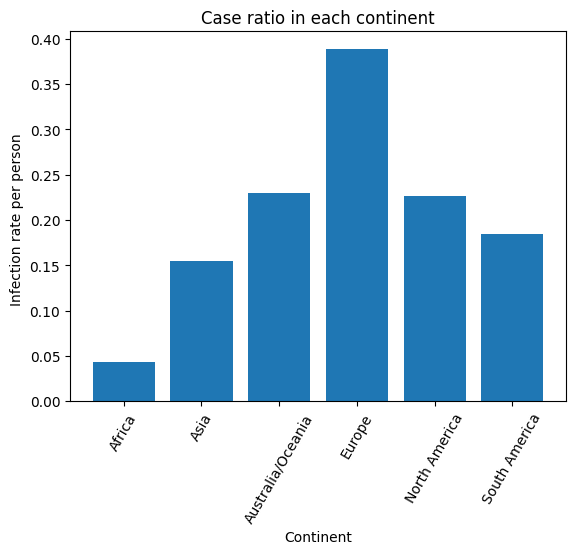

In [20]:
fig, ax = plt.subplots()
ContinentForCaseIndex = list(ContinentForCase.index)
numCon1 = np.arange(0,len(ContinentForCaseIndex))  
raito = ContinentForCase['Case rate'].values
ax.bar(ContinentForCaseIndex,raito) 
ax.set_ylabel('Infection rate per person ')
ax.set_xlabel('Continent')
ax.set_title('Case ratio in each continent')
plt.xticks(numCon1,ContinentForCaseIndex,rotation = 60)
plt.show()

`Comment: `
- The rate of one person dying from the disease is highest in Europe, followed by Australia/Oceania and North America, and the rate is quite high, it is approximately many times the rest of the continents.

In [21]:
newDf3 = df[['Tests/ 1M pop','1M pop','Continent']]
Continent2 = newDf3.dropna().groupby('Continent').mean().astype(int).apply(lambda x: round(x/pow(10,4),1))
Continent2.rename(columns = {'1M pop':'Rate of infection per person'}, inplace = True)
Continent2.rename(columns = {'Tests/ 1M pop':'Testing rate per person'}, inplace = True)

<AxesSubplot: xlabel='Continent'>

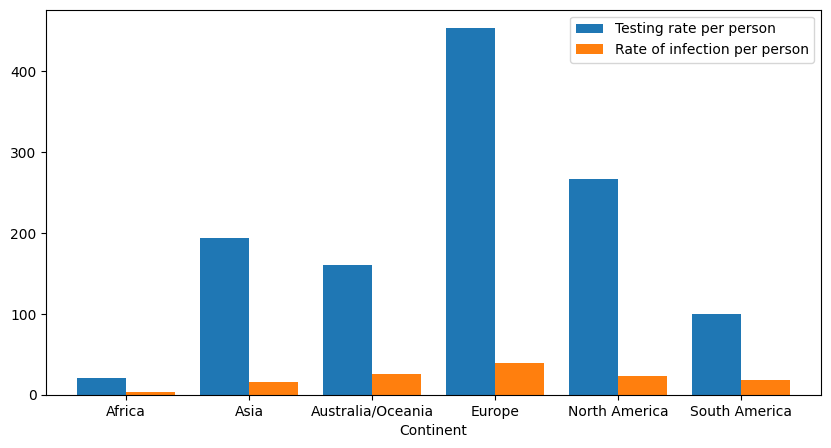

In [88]:
Continent2.plot.bar(rot=0,width=0.8,figsize=(10,5))

`Comment:` 
- What an interesting statistic, Europe with the highest rate of testing per population is also the continent with the highest number of cases, which shows that the disease originated in Asia but exploded quite strong in Europe.
- The continent with the second highest rate of infections is Oceania, which is also strange when the outbreak is Asia.
- And Asia, where the disease occurs, has the lowest infection rate among the continents and is only above Africa, which shows that Asia has quite effective disease handling options. In contrast, Europe and Oceania have not handled well in handling the disease, causing the disease to spread quickly, which can be identified by the number of cases.

In [23]:
newDf4 = df[['Country, Other','Total Cases','Population', 'Continent']].dropna()
newDf4['Rate case per population (%)'] = newDf4['Total Cases']*100/newDf4['Population']
nationCase = newDf4.sort_values('Rate case per population (%)', ascending=False)
nationCase = nationCase[['Country, Other','Continent','Rate case per population (%)']]

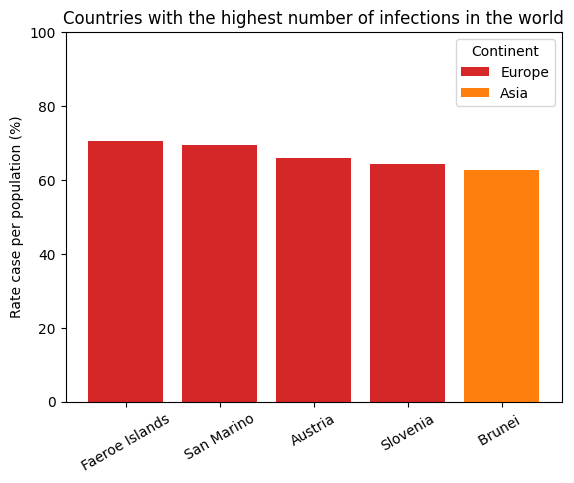

In [24]:
fig, ax = plt.subplots()
country = list(nationCase['Country, Other'])
values = np.array(nationCase['Rate case per population (%)'])
bar_labels = ['Europe','Europe','Europe','Europe','Asia']
bar_colors = ['tab:red','tab:red','tab:red','tab:red','tab:orange']
ax.bar(country[0],values[0], label = bar_labels[0], color = bar_colors[0])
ax.bar(country[1],values[1], color = bar_colors[1])
ax.bar(country[2],values[2], color = bar_colors[2])
ax.bar(country[3],values[3], color = bar_colors[3])
ax.bar(country[4],values[4], label = bar_labels[4], color = bar_colors[4])
ax.set_ylabel('Rate case per population (%)')
ax.set_title('Countries with the highest number of infections in the world')
ax.legend(title = 'Continent')
plt.xticks(rotation = 30)
ax.set_ylim(0,100)
plt.show()


`Comment: `
- The top 5 countries with the highest percentage of infected populations are European countries and one country in Asia, the rate of population infected in the top 5 countries is quite high in the range of 62% to 70% (WHO recommends that when the proportion of the population infected with COVID-19 exceeds 10% of the total population of a particular area, the health system in that area may become overwhelmed and unable to provide adequate supplies provide medical services to people with COVID-19 and other illnesses). This shows that the epidemic situation in these countries is quite serious, which does not exclude the possibility that reinfection cases exist in the data, but the number of such populations is quite high. This could potentially lead to an overload of the medical department.

## Phân tích top 10 quốc gia

### Phân tích dữ liệu 10 quốc gia có số ca nhiễm nhiều nhất trên thế giới:

In [25]:
top_10=df.sort_values(by=['Total Cases'],ascending=False)[:10]
top_10 

,"Country, Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,Continent
0,USA,105665981,1149253.0,103319965.0,1196763.0,2157.0,315604.0,3433.0,1.169268e+09,3492381.0,3.348053e+08,North America
1,India,44691956,530789.0,44156970.0,4197.0,NaN,31772.0,377.0,9.198164e+08,653914.0,1.406632e+09,Asia
2,France,39667102,165240.0,39435308.0,66554.0,869.0,604824.0,2519.0,2.714902e+08,4139547.0,6.558452e+07,Europe
3,Germany,38276190,169345.0,37906300.0,200545.0,NaN,456301.0,2019.0,1.223324e+08,1458359.0,8.388360e+07,Europe
4,Brazil,37085520,699310.0,36249161.0,137049.0,NaN,172208.0,3247.0,6.377617e+07,296146.0,2.153536e+08,South America
5,Japan,33346529,73334.0,21704743.0,11568452.0,119.0,265530.0,584.0,9.645984e+07,768085.0,1.255848e+08,Asia
6,S. Korea,30662229,34131.0,30455545.0,172553.0,147.0,597356.0,665.0,1.580406e+07,307892.0,5.132990e+07,Asia
7,Italy,25627473,188538.0,25294864.0,144071.0,104.0,425262.0,3129.0,2.686743e+08,4458380.0,6.026277e+07,Europe
8,UK,24396534,207695.0,24138845.0,49994.0,NaN,356165.0,3032.0,5.225265e+08,7628357.0,6.849791e+07,Europe
9,Russia,22454933,396696.0,21806101.0,252136.0,NaN,154006.0,2721.0,2.734000e+08,1875095.0,1.458059e+08,Europe


#### 1. Nhận xét về Total Cases, Total Recovered, Total Deaths, Active Cases:

<AxesSubplot: xlabel='Country, Other'>

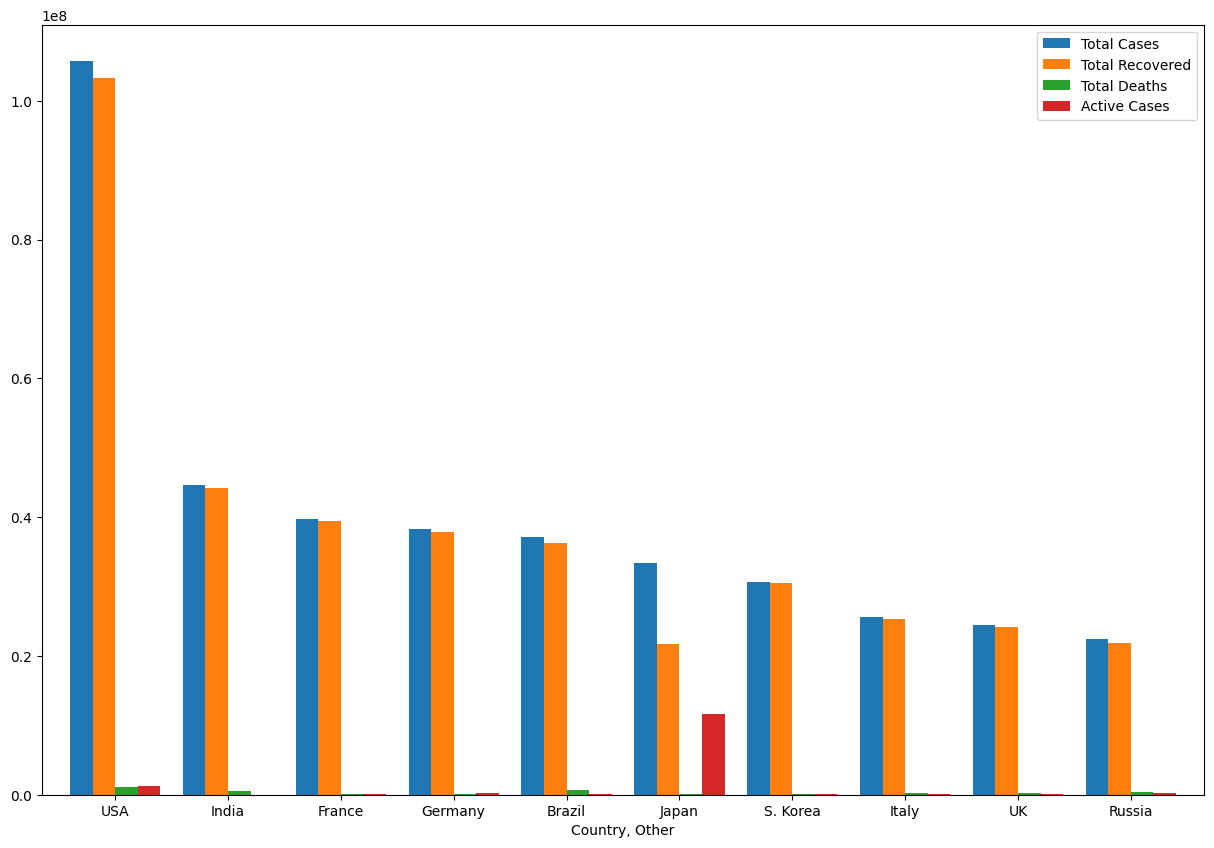

In [26]:
df1=top_10[['Country, Other','Total Cases', 'Total Recovered', 'Total Deaths','Active Cases']]
df1=df1.set_index('Country, Other')
df1.plot.bar(rot=0,width=0.8,figsize=(15,10))

- Tốc độ phục hồi dịch bệnh của các nước đều rất tốt ('TotalRecovered' xấp xỉ gần bằng 'TotalCases'), tất cả các nước không có sự chênh lệch gì quá đáng kể.
- USA và Japan là những nước đang có tỉ lệ số ca đang điều trị ( ActiveCases/ TotalCases) lớn trong top10, tuy nhiên nổi trội nhất chỉ có Japan, có vẻ như tình hình dịch bệnh vẫn còn đang căng thẳng ở đây. Nhưng nhìn chung, các nước đều đang kiểm soát được dịch (tỉ lệ ActiveCases/ TotalCases thấp).
- Tỉ lệ tử vong nhìn chung thấp, chứng tỏ bệnh không gây chết nhiều

#### 2. Tương quan Serious, Critical so với Active Cases:

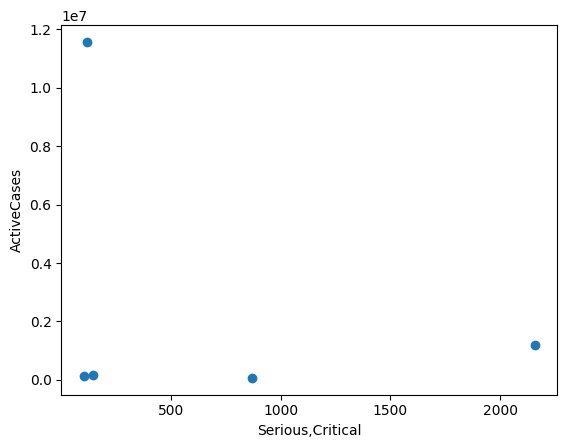

In [27]:
plt.scatter(x=top_10['Serious, Critical'], y=top_10['Active Cases'])
plt.xlabel('Serious,Critical')
plt.ylabel('ActiveCases')
plt.show()

- Ta thấy hai biến 'Serious, Critical' và 'ActiveCases' không có mối liên hệ với nhau. Nhưng biểu đồ vẫn cho ta thấy tỷ lệ bị biến chứng nặng do bệnh gây ra không nhiều.

#### 3. Nhận xét mối quan hệ giữa Total Cases/1M pop, Total Deaths/1M pop, Total Tests/1M pop:

array([[<AxesSubplot: xlabel='TotCases/ 1M pop', ylabel='TotCases/ 1M pop'>,
        <AxesSubplot: xlabel='Deaths/ 1M pop', ylabel='TotCases/ 1M pop'>,
        <AxesSubplot: xlabel='Tests/ 1M pop', ylabel='TotCases/ 1M pop'>],
       [<AxesSubplot: xlabel='TotCases/ 1M pop', ylabel='Deaths/ 1M pop'>,
        <AxesSubplot: xlabel='Deaths/ 1M pop', ylabel='Deaths/ 1M pop'>,
        <AxesSubplot: xlabel='Tests/ 1M pop', ylabel='Deaths/ 1M pop'>],
       [<AxesSubplot: xlabel='TotCases/ 1M pop', ylabel='Tests/ 1M pop'>,
        <AxesSubplot: xlabel='Deaths/ 1M pop', ylabel='Tests/ 1M pop'>,
        <AxesSubplot: xlabel='Tests/ 1M pop', ylabel='Tests/ 1M pop'>]],
      dtype=object)

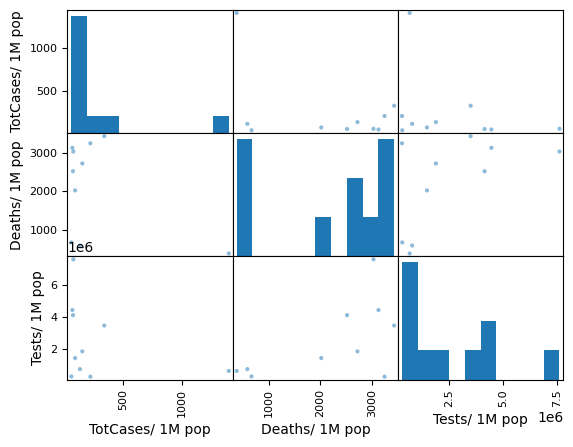

In [28]:
top_10['TotCases/ 1M pop'] = top_10['Total Cases']/ top_10['1M pop']
df1=top_10[['TotCases/ 1M pop','Deaths/ 1M pop','Tests/ 1M pop']]
pd.plotting.scatter_matrix(df1)

- Các histogram của 'TotCases/1M pop', 'Tests/1M pop', 'Deaths/1M pop' đều không đạt phân phối chuẩn.
- Histogram của cả 3 thuộc tính đều có xu hướng tăng, tuy nhiên không quá nhiều.
- Giữa 2 biến 'TotCases/1M pop' và 'Tests/1M pop' có mối quan hệ thuận, nghĩa là nếu 'Tests/1M pop' tăng thì 'TotCases/1M pop' cũng tăng.
- Tồn tại mối liên hệ yếu giữa 'Deaths/1M pop' với hai biến còn lại. Nếu tổng test hoặc tổng số ca nhiễm tăng thì tỉ lệ tử vong cũng tăng lên, tuy nhiên tỉ lệ tăng không quá cao.

#### 4. Liệu có quan hệ nhân quả giữa hai trường Total Cases và Total Tests không? (số ca nhiễm nhiều do có nhiều xét nghiệm?)

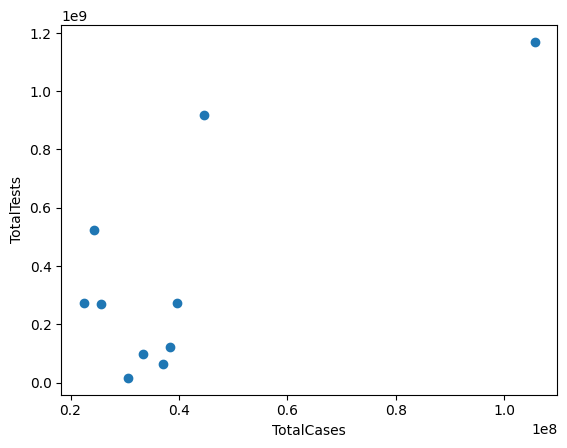

In [29]:
plt.scatter(x=top_10['Total Cases'], y=top_10['Total Tests'])
plt.xlabel('TotalCases')
plt.ylabel('TotalTests')
plt.show()

- Giữa 'TotalCases' và 'TotalTests' có mối quan hệ tương quan thuận với nhau, ta thấy nếu 'TotalCases' tăng thì 'TotalTests' cũng tăng và ngược lại.

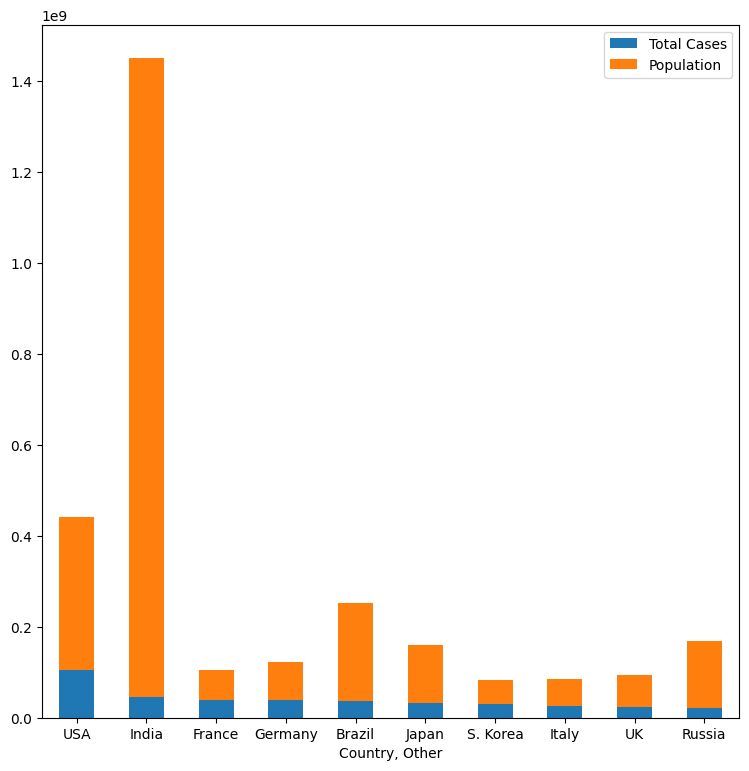

In [30]:
df1=top_10[['Country, Other','Total Cases', 'Population']]
#set index
df1=df1.set_index('Country, Other')
plot= df1.plot.bar(stacked=True,figsize=(9,9),rot=0)

### Phân tích dữ liệu 10 quốc gia đông dân nhất:

In [31]:
top10_population_df = df.sort_values(by=['Population'], ascending=False, ignore_index=True).iloc[:10, :]
top10_population_df

,"Country, Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,Continent
0,China,503302,5272.0,379053.0,118977.0,NaN,347.0,4.0,1.600000e+08,110461.0,1.448471e+09,Asia
1,India,44691956,530789.0,44156970.0,4197.0,NaN,31772.0,377.0,9.198164e+08,653914.0,1.406632e+09,Asia
2,USA,105665981,1149253.0,103319965.0,1196763.0,2157.0,315604.0,3433.0,1.169268e+09,3492381.0,3.348053e+08,North America
3,Indonesia,6740031,160956.0,6575541.0,3534.0,NaN,24146.0,577.0,1.141589e+08,408975.0,2.791345e+08,Asia
4,Pakistan,1577785,30645.0,1538689.0,8451.0,11.0,6875.0,134.0,3.057086e+07,133213.0,2.294890e+08,Asia
5,Nigeria,266628,3155.0,259938.0,3535.0,11.0,1230.0,15.0,5.708974e+06,26339.0,2.167469e+08,Africa
6,Brazil,37085520,699310.0,36249161.0,137049.0,NaN,172208.0,3247.0,6.377617e+07,296146.0,2.153536e+08,South America
7,Bangladesh,2037871,29445.0,1998448.0,9978.0,NaN,12138.0,175.0,1.525440e+07,90862.0,1.678857e+08,Asia
8,Russia,22454933,396696.0,21806101.0,252136.0,NaN,154006.0,2721.0,2.734000e+08,1875095.0,1.458059e+08,Europe
9,Mexico,7492112,333243.0,6729945.0,428924.0,NaN,56947.0,2533.0,1.964277e+07,149303.0,1.315628e+08,North America


#### 1. Biểu đồ thể hiện Total Cases, Total Recovered, Total Deaths, Total Tests.

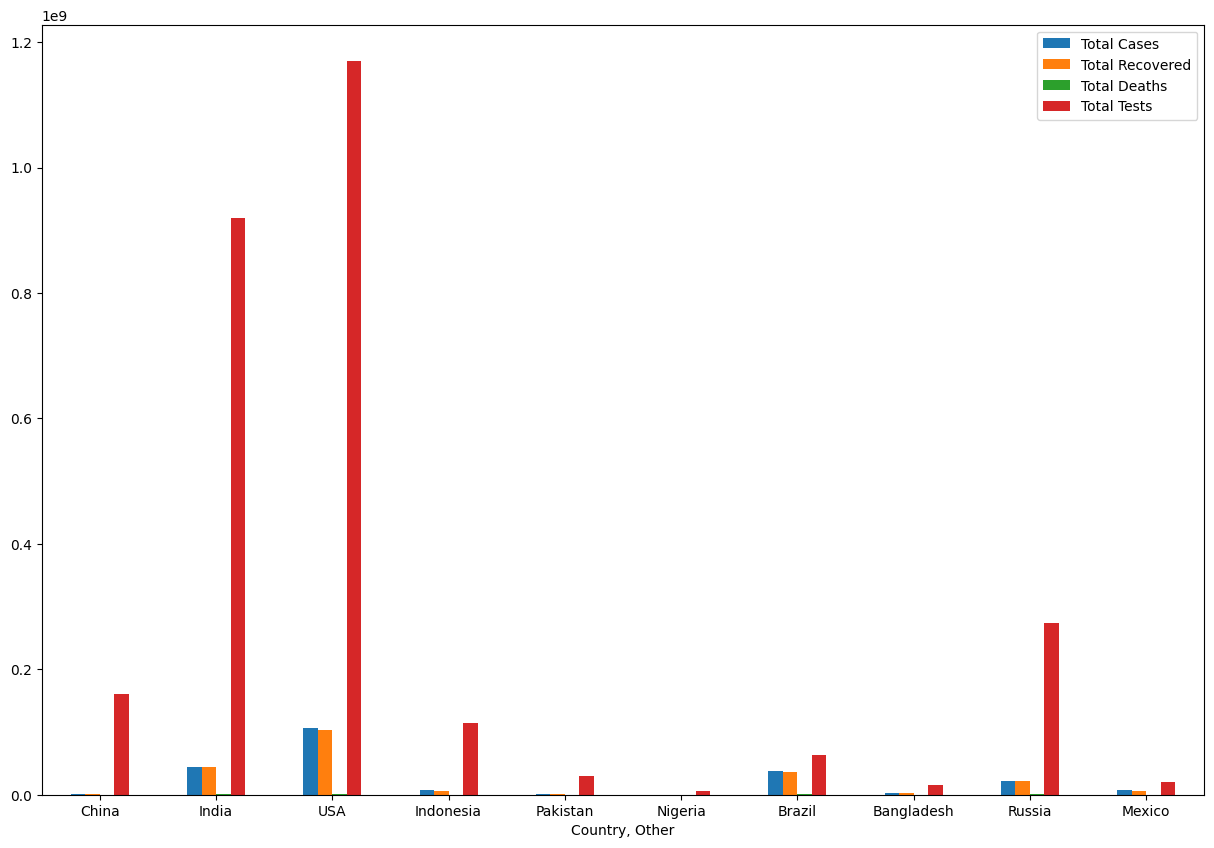

In [32]:
dfs = top10_population_df[['Country, Other', 'Total Cases', 'Total Recovered', 'Total Deaths', 'Total Tests']]
dfs = dfs.set_index('Country, Other')
ax = dfs.plot.bar(rot = 0, width = 0.5, figsize = (15,10))

- Total Cases, Total Recovered, Total Deaths và Total Tests có tỉ lệ với nhau. Khi Total Tests càng cao thì tương ứng 3 thuộc tính còn lại cũng có sự tăng.
- Tốc độ phục hồi dịch bệnh của các nước đều rất tốt (TotalRecovered xấp xỉ gần bằng TotalCases).
- Số ca tử vong (TotalDeaths) khá thấp nếu so sánh với TotalCases, TotalRecovered

#### 2. Mối quan hệ giữa Total Cases và Total Test: 

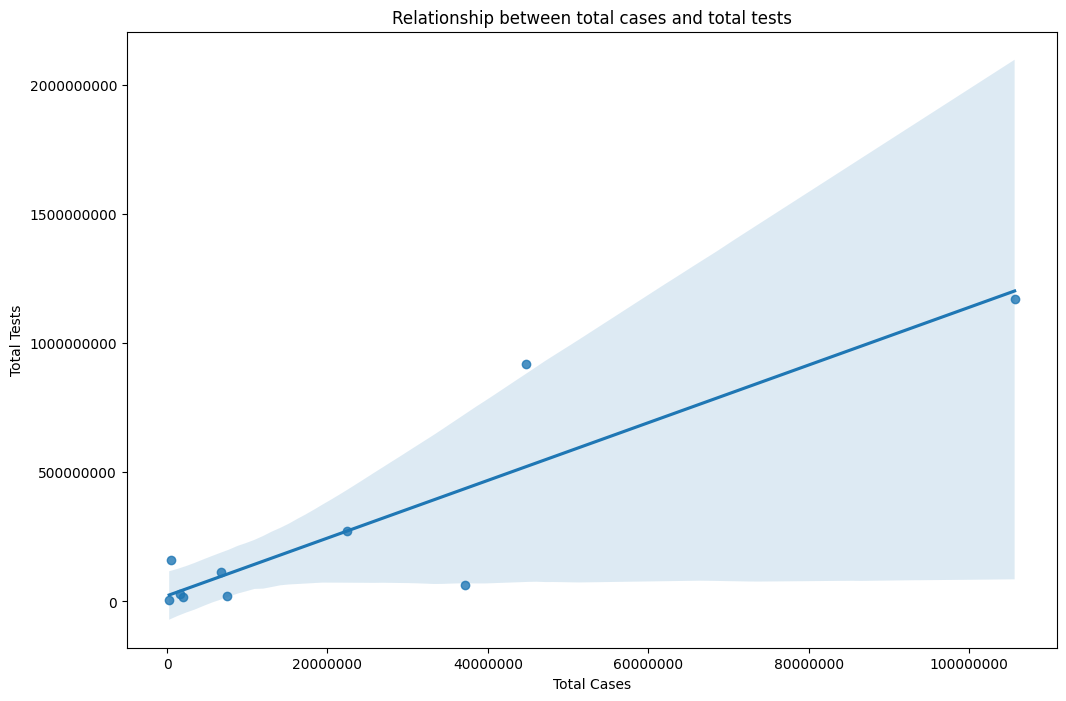

In [33]:
plt.figure(figsize = (12,8))
sns.regplot(data = top10_population_df, x = 'Total Cases', y = 'Total Tests')
plt.ticklabel_format(style = 'plain')
plt.title('Relationship between total cases and total tests')
plt.show()

- 2 thuộc tính này có mối quan hệ tuyến tính với nhau, khi cho người dân test càng nhiều thì số lượng ca mắc covid càng cao.